# Pandas Tutorial

In [1]:
import pandas as pd

| Time - Topic | Video Overview |
| :--- | :--- |
| **3:58 - Intro to Dataframes** | **Creating DataFrames, Index/Columns, Basic Functionality** |
| **8:25 - Loading in DataFrames from Files** | **(CSV, Excel, Parquet, etc.)** |
| **13:42 - Accessing Data** | **.head() .tail() .sample()** |
| **15:28 - Accessing Data** | **.loc() .iloc()** |
| **19:20 - Setting DataFrame Values** | **loc() & iloc()** |
| **20:20 - Accessing Single Values** | **.at() .iat()** |
| **21:11 - Accessing Data** | **Grab Columns, Sort Values, Ascending/Descending** |
| **23:01 - Iterating over a DataFrame (df) with a For Loop** | **df.iterrows()** |
| **24:12 - Filtering Data** | **Syntax Options, Numeric Values, Multiple Conditions** |
| **27:58 - Filtering Data** | **String Operations, Regular Expressions (Regex)** |
| **33:09 - Filtering Data** | **Query Functions** |
| **34:20 - Adding / Removing Columns** | **Basics, Conditional Values, Math Operations, Renaming Columns** |
| **41:40 - Adding / Removing Columns** | **String Operations**, **Datetime (pd.to_datetime) Operations** |
| **46:38 - Saving our Updated DataFrame** | **(df.to_csv, df.to_excel, df.to_parquet, etc)** |
| **47:14 - Adding / Removing Columns** | **Using Lambda & Custom Functions w/ .apply()** |
| 50:42 - Merging & Concatenating Data | pd.merge(), pd.concat(), types of joins |
| 58:33 - Handling Null Values (NaNs) | .fillna() .interpolate() .dropna() .isna() .notna() |
| 1:04:05 - Aggregating Data | value_counts() |
| 1:05:47 - Aggregating Data | Using Groupby - groupby() .sum() .mean() .agg() |
| 1:08:24 - Aggregating Data | Pivot Tables |
| 1:10:28 - Groupby combined with Datetime Operations | *-* |
| 1:14:38 - Advanced Functionality | .shift() .rank() .cumsum() .rolling() |
| 1:22:10 - New Functionality | Pandas 1.0 vs Pandas 2.0 - pyarrow |
| 1:25:29 - New Functionality | GitHub Copilot & OpenAI ChatGPT |
| 1:32:05 - What Next?? | Continuing your Python Pandas Learning… |

## Intro to Dataframes

ok, mari belajar mengenai `Data Frame` terlebih dahulu. Data Frame merupakan struktur utama dalam *library Python Pandas*. Dan kita bisa mengganggap *Data Frame* sebagai `Table` dengan tambahan toping dan fungsi. Jadi membebaskan kita bekerja dengan *spreadsheet* (excel) dan tipe lainya dengan mudah di Python.  

### Creating DataFrame


Ok, jadi seperti apa bentuk Data Frame? Well, kita bisa buat data kita sendiri dengan sangat mudah dengan cara seperti :

```python
df = pd.DataFrame(...data..)
```

In [2]:
# kita beri data bentuk 2D Array

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])

Ok, yang bisa kita lihat dari DataFrame diatas dan mulai melihat komponen yang membuat DataFrame itu sendiri.

In [3]:
# melihat 5 data teratas
df.head()

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


karena data sederhana yang kita buat hanya terdiri dari 3 baris, maka hanya akan menampilkan 3 baris

---

#### , columns = [ ... ]

Kita juga bisa menambahkan nama kolom pada DataFrame yang kita buat dengan menambahkan 

```python
, columns = ["A", "B", "C"]
```

jangan lupa tambahkan koma `,` sebelum menambah syntax `columns`

In [4]:
# menambahkan nama kolom

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns = ['A', 'B', 'C'])

In [5]:
# kita cek lagi 5 data teratas menggunakan .head()
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


#### Dictionary

Ini cara yang paling sering dipakai karena kita mendefinisikan **"Kolom demi Kolom".**

- **Logikanya**: `Key` (Kunci) jadi Judul Kolom, `Value` (List) jadi isinya ke bawah.

- **Rumusnya**: `{ 'Judul Kolom': [Isi Data 1, Isi Data 2, ...] }`

Contoh code :

In [6]:
# Data Mentah (Bentuk Dictionary)
data_buku = {
    'Judul': ['Laskar Pelangi', 'Bumi Manusia', 'Harry Potter'],
    'Penulis': ['Andrea Hirata', 'Pramoedya A. Toer', 'J.K. Rowling'],
    'Harga': [75000, 90000, 150000]
}

# Masak jadi DataFrame
df_buku = pd.DataFrame(data_buku)

df_buku

,Judul,Penulis,Harga
0,Laskar Pelangi,Andrea Hirata,75000
1,Bumi Manusia,Pramoedya A. Toer,90000
2,Harry Potter,J.K. Rowling,150000


- **Kelebihan**: Otomatis punya nama kolom. Paling enak dibaca mata manusia.

---

#### List of Lists

Ini dipakai kalau kamu punya data yang **"Baris demi Baris"**, tapi belum ada judulnya. Biasanya hasil dari *scraping* data website.

- **Logikanya**: Kamu tumpuk datanya dulu, baru kasih label kolom di akhir.
- **Rumusnya**: `[[Baris1], [Baris2], [Baris3]]` + `columns=[Nama2 Kolom]`

In [7]:
# Data Mentah (Bentuk List of Lists)
data_nilai = [
    ['Andi', 80, 90],   # Baris 1
    ['Budi', 75, 85],   # Baris 2
    ['Caca', 95, 100]   # Baris 3
]

# Masak jadi DataFrame (JANGAN LUPA parameter 'columns')
df_nilai = pd.DataFrame(data_nilai, columns=['Nama', 'Matematika', 'IPA'])

df_nilai

,Nama,Matematika,IPA
0,Andi,80,90
1,Budi,75,85
2,Caca,95,100


- **Penting**: Kalau lupa kasih `columns=['...']`, nanti nama kolomnya jadi angka `0`, `1`, `2`. Jelek dilihat.

---

#### JSON: Dari List of Dictionaries

Ini biasanya kalau kamu ambil data dari **API** atau database **NoSQL** (seperti MongoDB/Firebase). Setiap baris membawa kuncinya sendiri-sendiri.

- **Logikanya**: Setiap baris adalah satu paket lengkap (ada kunci dan isi).
- **Rumusnya**: `[ {Data1}, {Data2}, {Data3} ]`

In [8]:
# Data Mentah (Bentuk List of Dictionaries)
data_karyawan = [
    {'Nama': 'Agung', 'Divisi': 'IT', 'Gaji': 10},      # Baris 1
    {'Nama': 'Bayu', 'Divisi': 'HR', 'Gaji': 8},        # Baris 2
    {'Nama': 'Citra', 'Divisi': 'Finance', 'Gaji': 12}  # Baris 3
]

# Masak jadi DataFrame
df_karyawan = pd.DataFrame(data_karyawan)

df_karyawan

,Nama,Divisi,Gaji
0,Agung,IT,10
1,Bayu,HR,8
2,Citra,Finance,12


- **Kelebihan**: Kalau ada data yang bolong (misal Bayu nggak punya 'Gaji'), Pandas otomatis mengisinya dengan `NaN` (Kosong) tanpa error.

---

### Basic Function

#### .head()

Diatas kita tahu fungsi `.head()` untuk melihat 5 data teratas. Namun, kita juga bisa mengotak-atik `.head()` dengan memasukan angka bebas

In [9]:
# melihat 1 baris teratas
df.head(1) # ganti angka 1 dengan angka bebas

,A,B,C
0,1,2,3


In [10]:
# melihat 2 baris teratas
df.head(2)

,A,B,C
0,1,2,3
1,4,5,6


In [11]:
# melihat 1 baris teratas
df.head(3)

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


---

#### .tail()

Jika `.head()` digunakan untuk melihat 5 data teratas, maka `.tail()` digunakan untuk melihat 5 data terakhir.

In [12]:
df.tail()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [13]:
# 1 baris paling bawah atau -1
df.tail(1)

,A,B,C
2,7,8,9


In [14]:
# 2 baris paling bawah atau -1
df.tail(1)

,A,B,C
2,7,8,9


---

### Usefull Function

#### .columns

`.columns` untuk melihat *header* atau `nama kolom` yang ada dalam suatu DataFrame. 

In [15]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

---

#### .info

**`.info`** sangat berguna jika kita ingin melihat informasi lengkap dari `DataFrame` yang kita miliki

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


Kalau kita lihat sekilas **`df.info`** diatas, kita memiliki **`3 baris`** dan **`3 kolom`**. Serta ketiganya memiliki tipe data **integer 64bit** dimana :

int64 = 64 Bits = 8 Byte.

Lalu informasi lainnya adalah ukuran DataFrame kita 96.0 bytes

---

#### .describe()

In [17]:
df.describe()

,A,B,C
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


**`.describe()`** juga memberikan informasi yang berarti mengenai data kita. seperti rata-rata (`mean`), standar deviasi (`std`), nilai terkecil (`min`) dan lainnya. 

---

#### .nunique()

Digunakan untuk melihat data yang unik dalam satu DataFrame yang kita miliki

In [18]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [19]:
df.nunique()

A    3
B    3
C    3
dtype: int64

^ maksudnya ada 3 data unik di kolom A, B, dan C

In [20]:
df["A"].nunique

<bound method IndexOpsMixin.nunique of 0    1
1    4
2    7
Name: A, dtype: int64>

^ di kolom `A` ada 1, 4, dan 7 yang sifatnya unik.

---

#### .shape

Function yang berguna selanjutnya adalah **`.shape`**. Berguna untuk melihat berapa jumlah kolom dan baris yang kita miliki

In [21]:
df.shape

(3, 3)

Maksudnya memiliki 3 baris dan 3 kolom. Kita buat data baru deh biar bisa lihat dengan jelas

In [22]:
# menambah data baru untuk cek .shape
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9], [10,11,12] ], columns = ['A', 'B', 'C'])

In [23]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [24]:
df.shape

(4, 3)

yang berarti data diatas memiliki 4 baris dan 3 kolom

---

#### .size

size sih penting ga penting ya, ya karena cuman kaya melihat total data kalo di itung satu - satu ada berapa.

In [25]:
df.size

12

Dengan asumsi tidak ada data kosong dan semua data di kolom dan baris terisi semua. 12 dengan mudah kita ketahui hasilnya dari 4 (baris) x 3 (kolom)

---

### Index / Columns

lalu jika kita ingin melihat kembali DataFrame buatan kita tadi, 

In [26]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


Angka `0`, `1`, dan `2` merupakan **`index`** atau nomor baris dalam suatu *DataFrame*. Kita bia cek dengan cara seperti ini :

#### .index

In [27]:
df.index

RangeIndex(start=0, stop=4, step=1)

---

#### .index.tolist()

Dan kita juga bisa melihatnya dalam bentuk *list*.

In [28]:
df.index.tolist()

[0, 1, 2, 3]

---

#### , index = [ ... ]

Secara *default*, `index` mengurutkan data dengan angka dimulai dari `0`, `1`, `2` dan seterusnya sampai baris terakhir. Namun kita bisa menggantinya dengan selain angka seperti ini :  

In [29]:
# kita modif data df diatas
# mengganti index menjadi huruf

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["A", "B", "C"])

In [30]:
df

,A,B,C
A,1,2,3
B,4,5,6
C,7,8,9


In [31]:
# kita modif data df diatas
# mengganti index menjadi huruf

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["x", "y", "z"])

In [32]:
df

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


coba kita cek lagi 

In [33]:
df.index

Index(['x', 'y', 'z'], dtype='object')

---

## Loading DataFrames from File

### CSV File

Membuat DataFrame seperti :

```python
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["x", "y", "z"])
```

Sebenarnya memang bisa. tapi dalam dunia nyata, biasanya kita akan *load* dari file. Mari kita latihan menggunakan data sederhana.

Kita punya data csv sederhana, yaitu coffee.csv yang berisi data sederhana seperti berikut :

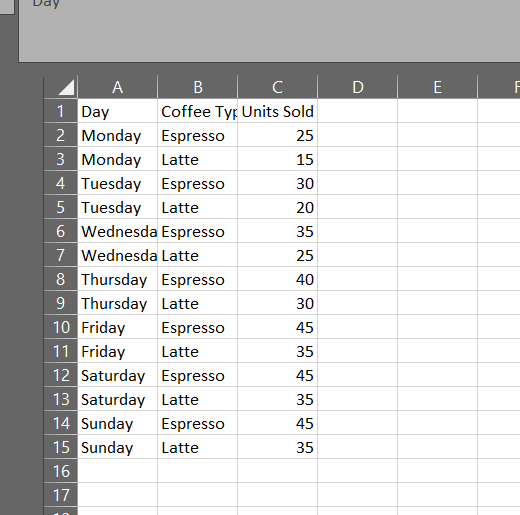

Merupakan data sederhana dari penjualan kopi dari sebuah cafe dan kita akan mencoba membaca file tersebut menggunakan Python

```python
pd.read_csv(file_name)
```

In [34]:
coffee = pd.read_csv('./warm-up data/coffee.csv') 
# maksud . tuh mundur satu folder sebelumnya, lalu masuk ke folder warm-up data

In [35]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


### Github Raw File CSV

Salah satu hal yang keren di Python Pandas adalah kita ga harus mendownload data di lokal, kita bisa menggunakan repo di Github. 

Caranya, bebas mau menggunakan `repo` milik siapa pun. Lalu cari file `csv`, lalu klik pada bagian **`raw`**

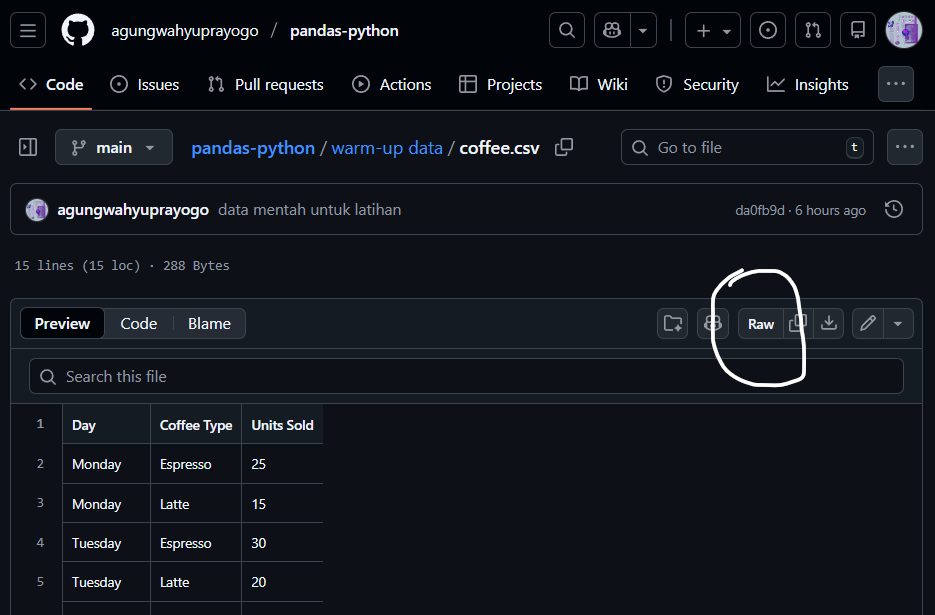

Jika sudah, kita bisa tinggal copy link yang ada diatas :

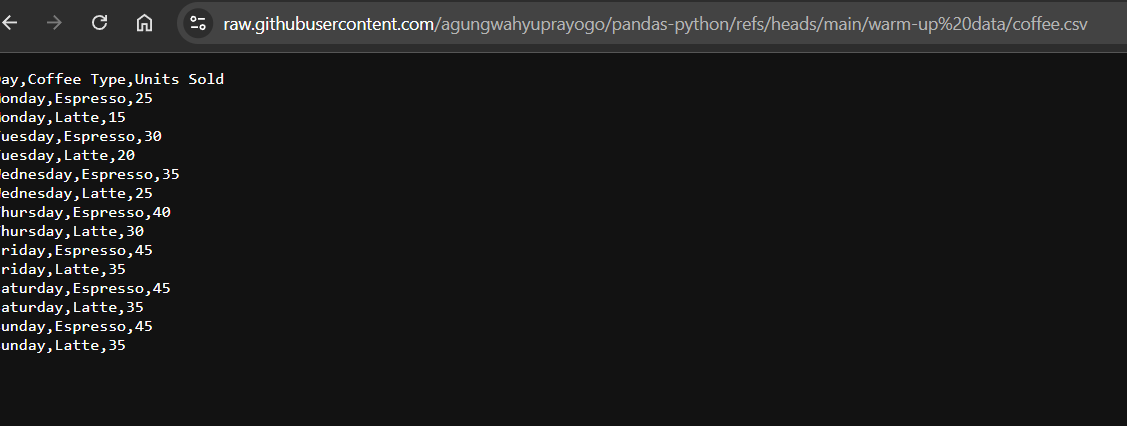

In [36]:
# masukan link pada ('link')

# hapus tanda pagar (#), jika sudah terhubung ke internet
# coffee = pd.read_csv('https://raw.githubusercontent.com/agungwahyuprayogo/pandas-python/refs/heads/main/warm-up%20data/coffee.csv')

In [37]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Namun, agar komputasi berjalan lancar, disarankan untuk mendownload file ke dalam lokal dan *load* data tersebut. Jika menggunakan data dari internet di 'takutkan' akan memakan waktu lebih lama dan takut ada kendala lainnya.

In [38]:
# from local
coffee = pd.read_csv('./warm-up data/coffee.csv')

In [39]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Beberapa hal yang perlu kamu ketahui tentang *load data* adalah `CSV` merupakan data yang paling umum digunakan. Bukan bentuk data yang terbaik, tapi kembali lagi dengan kebutuhan dan kasus yang dibutuhkan. Namun satu hal menyenangkan mengenai `csv` adalah mereka mudah untuk dibaca. Memang ada satu **kelemahan** dari file berformat `csv` ini, **yaitu memiliki ukuran yang terbilang besar**. 

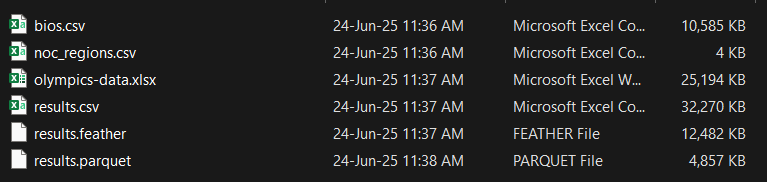

Saya memiliki data `Result` dari *Olympic* tahun 1860 adalah **ukurannya mencapai sekitar 32 Megabytes** hanya untuk ukuran satu file `csv`.

Tak perlu khawatir, **ada bentuk format file yang dapat kita gunakan** seperti format file **`feather`** yang memiliki data yang plek-numplek sama tapi ukurannya cuma **`12 Megabytes`**. Atau file dengan format **`parquet`** yang hanya memiliki ukuran **4 Megabytes**, dimana format file tersebut sangat populer di dunia _data engineering_.

Alternatif lain kita dapat menggabung beberapa file `csv` ke dalam bentuk file **`Excel`**. Dapat digunakan juga namun akan menjadi **file dengan waktu loading paling lama dari pada file format lain**.

Dengan Python, kita dapat load semua bentuk format diatas dengan cara berikut :

### Feather File

In [40]:
results = pd.read_feather('./data/results.feather')

In [41]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


---

### Parquet File

In [42]:
results = pd.read_parquet('./data/results.parquet')

In [43]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


Kita lihat, kita dapat melihat data `Olympic Result` ini dalam bentuk Data Frame **begitu mudah dan cepat.**

### Excel File

Kita pun dapat *load* data file excel dengan cara berikut :

In [44]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx')

Lama bet njirr :v oke kita lihat dulu isi datanya :

In [45]:
olympics_data.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


Karena file excel bisa menaruh `sheets` lebih dari satu, 

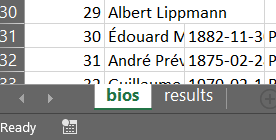

kita bisa juga untuk lebih spesifik mengambil data `sheets` bagian mana yang kita mau :

In [46]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx', sheet_name="results")

Alamak harus **nunggu 17 detik hanya untuk load satu file `excel`** :) padahal file dengan **format `parquet` cuman butuh sekitar 1-2 detik**. jadi kalo kalian butuh waktu dengan cepat, disarankan menggunakan file dengan format `parquet`. Tapi yaa kalo kalian bekerja dan terpaksa berkolaborasi dengan orang lain ya memang `csv` sudah cukup.

Dan sekarang kalo kita lihat harusnya data `Olympics` di `sheets` sudah berubah : 

In [47]:
olympics_data.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


### Konversi Format File

Namun jika memang benar-benar dibutuhkan untuk load data dalam bentuk format lain, kita dapat mengkonversi nya dengan cara berikut :

In [48]:
bios = pd.read_csv('./data/bios.csv')

Supaya kita masukan ke dalam folder `konversi data`. Agar data tidak berantakan dan tidak satu folder dengan file ipynb

#### .to_parquet( folder/nama file )

In [49]:
# Untuk Parquet
bios.to_parquet("konversi data/bios.parquet")

#### .to_feather(folder/nama file )

In [50]:
# Untuk Feather
bios.to_feather("konversi data/bios.feather")

**Kita tes panggil lagi ya**

In [51]:
bios_parquet = pd.read_parquet('konversi data/bios.parquet')
bios_parquet

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,None
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,None
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,None
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,None
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [52]:
bios_feather = pd.read_feather('konversi data/bios.feather')
bios_feather

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,None
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,None
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,None
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,None
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


berhasil semua!

Sebenarnya ga cuman `to_parquet`, `to_feather`, tapi juga masih banyak yang lain bahkan ke csv, excel.

---

---

---

## Accessing Data I

oke, selanjutnya kita liat bagaimana kita bisa mengakses data dengan cara yang berbeda-beda menggunakan `Pandas`.

DataFrame percontohan menggunakan `coffee.csv`. 

Dan pertama kita ingin melihat 5 data teratas menggunakan `.head()`

### .head()

In [53]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


Jika ingin melihat 7 data teratas, cukup masukan angka 7 dalam tanda kurung

In [54]:
coffee.head(7)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40


---

Untuk melihatnya secara full cukup dengan :

#### DataFrame names

ini paling simple

In [55]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

#### print(DataFrame Name)

Namun ada beberapa environmet / editor yang tidak secara otomatis menampilkan cara diatas, sehingga harus kita `print()` terlebih dahulu baru muncul

In [56]:
print(coffee)

          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35


---

#### display(DataFrame Name)

Bisa juga menggunakan `display()`. ya walaupun hasilnya tetap akan sama

In [57]:
display(coffee)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

### .tail()

Untuk melihat 5 data terakhir, secara *default* kita cukup mengetik .tail()

In [58]:
coffee.tail()

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


Jika berubah pikiran seperti ingin melihat 7 data terakhir :

In [59]:
coffee.tail(7)

,Day,Coffee Type,Units Sold
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


---

### .sample

salah satu hal yang perlu diketahu juga adalah, jika kamu ingin mengakses data secara acak, kita bisa menggunakan `.sampe()`. Secara default hanya akan menampilkan satu data :

In [60]:
coffee.sample() 

,Day,Coffee Type,Units Sold
4,Wednesday,Espresso,35


**Silahkan run berulang kali, maka hasilnya akan selalu berubah**

Jika ingin melihat data secara acak sebanyak 7 sample, maka masukan *value* dalam tanda kurung

In [61]:
coffee.sample(7)

,Day,Coffee Type,Units Sold
7,Thursday,Latte,30
5,Wednesday,Latte,25
10,Saturday,Espresso,45
0,Monday,Espresso,25
1,Monday,Latte,15
12,Sunday,Espresso,45
3,Tuesday,Latte,20


In [62]:
coffee.sample(4)

,Day,Coffee Type,Units Sold
13,Sunday,Latte,35
7,Thursday,Latte,30
0,Monday,Espresso,25
3,Tuesday,Latte,20


cara `.sample()` terkadang digunakan jika ingin melihat data dalam bentuk *scattered* dan mungkin ingin melihat data paling atas apa, data paling bawah apa tanpa harus mengikuti data bawaan file.

#### , random_state = 

ada cara semisal kita ingin menetapkan angka sample yang cocok, kita bisa menambahkan *value* ke dalam `random_state` :

In [63]:
coffee.sample(10, random_state=101)

,Day,Coffee Type,Units Sold
12,Sunday,Espresso,45
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
13,Sunday,Latte,35
10,Saturday,Espresso,45
5,Wednesday,Latte,25
0,Monday,Espresso,25
4,Wednesday,Espresso,35
8,Friday,Espresso,45
9,Friday,Latte,35


**Jika kita sudah menentukan `random_state`, sebanyak apa-pun kita run hasilnya akan tetap sama**. kecuali jika kita merubah *value* dalam `random_state`.  -> Istilahnya *deterministic*

---

oke, kita udah tahu caranya melihat data teratas, data terbawah, data acak. Nah bagaimana caranya jika kita ingin mengakses data secara spesifik? Well, kita bisa menggunakan `.loc` dan `.iloc`

### .loc[ ]

kita awali dengan loc terlebih dahulu ya.

`loc` memperbolehkan kita untuk filter baris dan kolom *DataFrame* kita. Lebih detailnya seperti ini :

```python
coffee.loc[# row / baris , coloumn / kolom ]
```

okedeh, kita coba dulu dengan mengakses baris index ke-0. Kita lihat dulu DataFrame kita

In [64]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


kita coba akses menggunakan `.loc` untuk index ke-0

In [65]:
coffee.loc[0]

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

Jika ingin mengakses baris berdasarkan index lebih dari satu baris :

```python
coffee.loc[ [value, value, value] ]
```

Semisal kita ingin mengakses baris index ke-1, 4, dan 6

In [66]:
coffee.loc[ [1, 4, 6] ]

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
4,Wednesday,Espresso,35
6,Thursday,Espresso,40


Lalu juga kita bisa `slicing` seperti dimulai dari berapa hingga berapa

In [67]:
coffee.loc[0:3]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20


In [68]:
coffee.loc[1:5]

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25


dari index ke-10 hingga akhir

In [69]:
coffee.loc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


atau dari awal hingga index ke-10

In [70]:
coffee.loc[:10]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


seperti yang sudah dijelaskan diatas, kalo kita juga bisa mengakses kolom

```python
coffee.loc[# row / baris , coloumn / kolom ]
```

kita coba akses kolom `"Days"`

In [71]:
coffee.loc[ [1,5,7] , "Day" ]

1       Monday
5    Wednesday
7     Thursday
Name: Day, dtype: object

Lalu semisal 2 kolom, kita perlu menambahkan `[]` terlebih dahulu agar tidak error

In [72]:
coffee.loc[ [1,5,7] , ["Day", "Units Sold"] ]

,Day,Units Sold
1,Monday,15
5,Wednesday,25
7,Thursday,30


lalu semisal kita ingin mengakses semua data namun hanya di kolom `Days` dan `Units Sold`

In [73]:
coffee.loc[ : , ["Day", "Units Sold"] ]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


---

### .iloc[ ]

cara kerjanya hampir mirip dengan `loc`. Hanya saja di `iloc` kita perlu menggantinya dengan angka

In [74]:
coffee.iloc[ : , [0, 2] ] # days dan units sold kita ganti urutan kolom

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


In [75]:
coffee.iloc[ 2:10 , 1 ]

2    Espresso
3       Latte
4    Espresso
5       Latte
6    Espresso
7       Latte
8    Espresso
9       Latte
Name: Coffee Type, dtype: object

---

Tapi satu hal yang harus kita ketahui adalah, **jika kita mengubah index yang awalnya angka urutan baris dari 0 hingga akhir dan menggantinya dengan string, maka `.loc` akan error**. Kita coba deh mengganti index menggunakan hari

In [76]:
coffee.index = coffee["Day"]

In [77]:
coffee

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25
Thursday,Thursday,Espresso,40
Thursday,Thursday,Latte,30
Friday,Friday,Espresso,45


oke, berhasil yang mengubah index menggunakan `Day`

Nah akan error jika kita mengaksesnya menggunakan `loc`

```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[86], line 2
      1 # run error 
----> 2 coffee.loc[0:]

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1191, in _LocationIndexer.__getitem__(self, key)
   1189 maybe_callable = com.apply_if_callable(key, self.obj)
   1190 maybe_callable = self._check_deprecated_callable_usage(key, maybe_callable)
-> 1191 return self._getitem_axis(maybe_callable, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1411, in _LocIndexer._getitem_axis(self, key, axis)
   1409 if isinstance(key, slice):
   1410     self._validate_key(key, axis)
-> 1411     return self._get_slice_axis(key, axis=axis)
   1412 elif com.is_bool_indexer(key):
   1413     return self._getbool_axis(key, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1443, in _LocIndexer._get_slice_axis(self, slice_obj, axis)
   1440     return obj.copy(deep=False)
   1442 labels = obj._get_axis(axis)
-> 1443 indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
   1445 if isinstance(indexer, slice):
   1446     return self.obj._slice(indexer, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6662, in Index.slice_indexer(self, start, end, step)
   6618 def slice_indexer(
   6619     self,
   6620     start: Hashable | None = None,
   6621     end: Hashable | None = None,
   6622     step: int | None = None,
   6623 ) -> slice:
   6624     """
   6625     Compute the slice indexer for input labels and step.
   6626 
   (...)
   6660     slice(1, 3, None)
   6661     """
-> 6662     start_slice, end_slice = self.slice_locs(start, end, step=step)
   6664     # return a slice
   6665     if not is_scalar(start_slice):

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6879, in Index.slice_locs(self, start, end, step)
   6877 start_slice = None
   6878 if start is not None:
-> 6879     start_slice = self.get_slice_bound(start, "left")
   6880 if start_slice is None:
   6881     start_slice = 0

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6794, in Index.get_slice_bound(self, label, side)
   6790 original_label = label
   6792 # For datetime indices label may be a string that has to be converted
   6793 # to datetime boundary according to its resolution.
-> 6794 label = self._maybe_cast_slice_bound(label, side)
   6796 # we need to look up the label
   6797 try:

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6727, in Index._maybe_cast_slice_bound(self, label, side)
   6725 # reject them, if index does not contain label
   6726 if (is_float(label) or is_integer(label)) and label not in self:
-> 6727     self._raise_invalid_indexer("slice", label)
   6729 return label

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:4301, in Index._raise_invalid_indexer(self, form, key, reraise)
   4299 if reraise is not lib.no_default:
   4300     raise TypeError(msg) from reraise
-> 4301 raise TypeError(msg)

TypeError: cannot do slice indexing on Index with these indexers [0] of type int
```

Tapi kalo kita ganti menggunakan index berupa string (karena udah diubah)

In [78]:
coffee.loc["Monday"]

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15


In [79]:
coffee.loc[ ["Monday", "Wednesday"]]

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25


In [80]:
coffee.loc[ "Monday" : "Wednesday" , "Units Sold"]

Day
Monday       25
Monday       15
Tuesday      30
Tuesday      20
Wednesday    35
Wednesday    25
Name: Units Sold, dtype: int64

jadi intinya : 

```python
coffee.loc[baris, kolom] 
```

```python
coffee.iloc[baris, kolom] # hanya dapat diakses dengan index (angka) 
```


kita load data coffee kembali dari awal

In [81]:
coffee = pd.read_csv('./warm-up data/coffee.csv')

In [82]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

---

### Setting DataFrame Values 

#### Change Value with .loc

Anggaplah kita punya kesalah di DataFrame dan kita mencoba untuk memperbaikinya, 

In [83]:
coffee.loc[1]

Day            Monday
Coffee Type     Latte
Units Sold         15
Name: 1, dtype: object

Seharusnya yang terjual 10, bukan 15. 

Jadi `index` ke-1 `Units Sold` = 15 -> 10

In [84]:
coffee.loc[1, "Units Sold"] = 10

Kita cek lagi, harusnya sudah berubah

In [85]:
coffee.loc[1]

Day            Monday
Coffee Type     Latte
Units Sold         10
Name: 1, dtype: object

**Kita juga bisa mengganti banyak data sekaligus**

In [86]:
coffee.loc[2:5] 

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25


In [87]:
coffee.loc[2:5, "Units Sold"] = 25

In [88]:
coffee.loc[2:5]

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,25
3,Tuesday,Latte,25
4,Wednesday,Espresso,25
5,Wednesday,Latte,25


---

#### Change Value with iloc

kita coba juga menggunakan `.iloc`

In [89]:
coffee.iloc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


Semisal kita ingin mengubah data penjulan dari 10 hingga akhir menjadi 40 (menggunakan iloc)

In [90]:
# jangan lupa, iloc menggunakan nomor index di kolom maupun index
coffee.iloc[10:, 2] = 45 

In [91]:
coffee.iloc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,45
12,Sunday,Espresso,45
13,Sunday,Latte,45


---

## Accessing Data II

Kita Load ulang ya menggunakan data asli

In [92]:
coffee = pd.read_csv('./warm-up data/coffee.csv')
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Salah satu cara yang paling efektif untuk mengakses suatu DataFrame adalah menggunakan `.at` dan `.iat`. Sebenernya mirip cara kerjanya dari `.loc` dan `.iloc`, tapi untuk `.at` dan `.iat` disarankan mencari value secepat dan seefisien mungkin dalam hal proses waktu *processing*.

### .at[ ]

Mirip `.loc` hanya saja hanya bisa untuk mengakses 1 value spesifik, 

```python
coffee.at[baris, kolom]
```

In [93]:
coffee.at[1, "Units Sold"]

np.int64(15)

In [94]:
coffee.at[1, "Day"]

'Monday'

Namun akan error jika kita memasukan 2 kombinasi baris atau kolom

----

### .iat[ ]

lagi-lagi mirip dengan `.iloc` hanya saja digunakan untuk mengakses value 1 baris dan 1 kolom

In [95]:
coffee.iat[1,2]

np.int64(15)

In [96]:
coffee.iat[1,1]

'Latte'

---

## Accessing Data II

Tentu ada cara lain untuk mengakses data selain `.loc`, `.iloc`, `.at` dan `.iat`. Yaitu dengan **`Grab Columns`, `Sort Values`, `Ascending/Descending`**. Kita bahas satu-persatu :

### Grab Columns

Cara pertama untuk mengakses data, khususnya kolom adalah cukup menggunakan *bracket* atau kurung siku.

In [97]:
coffee["Day"]

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

Kalo **kolomnya lebih dari satu, jangan lupa gunakan `bracket`** lagi

In [98]:
coffee[ ["Day", "Units Sold" ] ]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


Bisa juga menggunakan **`.nama_kolom`**. Tapi kalo nama kolomnya mengandung spasi, ga bisa make `.nama_kolom`

In [99]:
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

---

### Sort Value

Kita bisa mengurutkan data semisal dari yang terkecil dulu atau terbesar dulu dengan syntax `.sort_values(" .. ")`. 
Secara default urutanya `Ascending` atau dari yang terkecil dahulu baru ke terbesar.

In [100]:
coffee.sort_values("Units Sold")

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
3,Tuesday,Latte,20
0,Monday,Espresso,25
5,Wednesday,Latte,25
2,Tuesday,Espresso,30
7,Thursday,Latte,30
4,Wednesday,Espresso,35
9,Friday,Latte,35
13,Sunday,Latte,35
11,Saturday,Latte,35


Jika datanya berupa string, data akan diurutkan dari huruf abjad

In [101]:
coffee.sort_values("Day")

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
9,Friday,Latte,35
0,Monday,Espresso,25
1,Monday,Latte,15
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35
6,Thursday,Espresso,40
7,Thursday,Latte,30


**ingat!** jika ingin lebih dari 1 kolom gunakan `bracket` terlebih dahulu -> `[ ]`

In [102]:
coffee.sort_values( ["Day", "Units Sold"] ) 

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
8,Friday,Espresso,45
1,Monday,Latte,15
0,Monday,Espresso,25
11,Saturday,Latte,35
10,Saturday,Espresso,45
13,Sunday,Latte,35
12,Sunday,Espresso,45
7,Thursday,Latte,30
6,Thursday,Espresso,40


---

**kalo** cuman **mau nampilin beberapa kolom** doang dan **mengurutkan values**

In [103]:
coffee[["Day", "Units Sold"]].sort_values("Units Sold")

,Day,Units Sold
1,Monday,15
3,Tuesday,20
0,Monday,25
5,Wednesday,25
2,Tuesday,30
7,Thursday,30
4,Wednesday,35
9,Friday,35
13,Sunday,35
11,Saturday,35


---

#### , ascending = 

Jika ingin mengurutkan data dari terbesar ke terkecil, kita bisa gunakan tambahan syntax berikut :

In [104]:
coffee.sort_values("Units Sold", ascending=False)

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
8,Friday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
11,Saturday,Latte,35
13,Sunday,Latte,35
9,Friday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


Maka secara otomatis akan mengurutkan dari yang terbesar terlebih dahulu.

Lalu **bagaimana jika kita ingin mengurutkan satu kolom ascending** sedangkan **kolom lain descending**? Tenang :

In [105]:
coffee.sort_values( ["Units Sold", "Coffee Type"] , ascending=[0,1]) # 0 untuk False , 1 untuk True

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


Maksud dari `ascending=[0,1]` 

- Urutkan `Units Sold` secara *descending* (karena 0)
- Urutkan `Coffee Type` secara *ascending* (karena 1)

Kalo masih bingung, coba liat baris ini : 

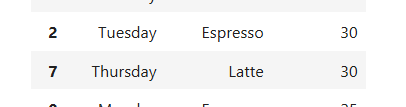

terlihat baris tersebut sama-sama terjual 30, namun yang di dahulukan adalah `Coffee Type = Espresso` karena tadi kita set **`Coffee Type`** ascending=True` 

---

---

## df.iterrows()

### Iterating over a DataFrame (df) with a For Loop

Lalu, ada cara lain yang sebenarnya tidak terlalu disarankan untuk digunakan banyak kasus, tapi terkadang cara ini bisa digunakan untuk melihat data baris per baris dari DataFrame secara detail. 

In [106]:
for index, row in coffee.iterrows():
    print(index)
    print(row)
    print('\n\n\n') # untuk memberi jarak satu baris dengan baris lain

0
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object




1
Day            Monday
Coffee Type     Latte
Units Sold         15
Name: 1, dtype: object




2
Day             Tuesday
Coffee Type    Espresso
Units Sold           30
Name: 2, dtype: object




3
Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: 3, dtype: object




4
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: 4, dtype: object




5
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: 5, dtype: object




6
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: 6, dtype: object




7
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: 7, dtype: object




8
Day              Friday
Coffee Type    Espresso
Units Sold           45
Name: 8, dtype: object




9
Day            Friday
Coffee Type     Latte
Units Sold         35
Name: 9, dtype: object





## Filtering Data

Mari kita masuk ke data yang lebih menarik, dan kita akan mencoba *filtering data*. Dan kemungkinan hampir sisa tutorial `Pandas` akan menggunakan Data ini.

In [107]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


Jadi kita akan menggunakan data atlet dari `Olympics`. Kita lihat terlebih dahulu datanya : 

In [108]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [109]:
bios.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18
145499,149814,Bill Phillips,1913-07-15,Dulwich Hill,New South Wales,AUS,Australia,NaN,NaN,2003-10-20


Nah kita bakal apain nih data? bakal ngelakuin filtering apa?

Mungkin bisa kita mulai dengan filtering .. tinggi badan (height) deh ya :

In [110]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


Kita lihat berdasarkan informasi data diatas, jika `height_cm`bertipe data `float` dan tentunya menggunakan satuan *centi meter*. Kita bisa coba otak-atik data atlet berdasarkan data angka tadi

### Syntax Options, Numeric Values

In [111]:
bios.loc[bios["height_cm"] > 200]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1080,1087,Bozhil Lozanov,1934-08-16,NaN,NaN,NaN,Bulgaria,208.0,133.0,NaN
1673,1680,Alexis Rubalcaba,1972-08-09,Pedro Betancourt,Matanzas,CUB,Cuba,204.0,95.0,NaN
2647,2659,Milan Šrejber,1963-12-30,Praha (Prague),Hlavní město Praha,CZE,Czechoslovakia,203.0,98.0,NaN
2827,2839,Nik'oloz Deriugini,1959-04-30,Kutaisi,Imereti,GEO,Soviet Union,206.0,105.0,NaN
2832,2844,Elşad Qadaşev,1968-05-01,Bakı,Bakı,AZE,Unified Team,205.0,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143784,147440,Daniel Miklasevich,1997-07-17,NaN,NaN,NaN,United States,203.0,NaN,NaN
143833,147489,Garrett Muagututia,1988-02-26,NaN,NaN,NaN,United States,205.0,NaN,NaN
143834,147490,Kyle Ensing,1997-03-06,NaN,NaN,NaN,United States,201.0,NaN,NaN
143835,147491,Mitch Stahl,1994-08-31,NaN,NaN,NaN,United States,203.0,NaN,NaN


---

kalo dirasa kolomnya terlalu banyak, kita bisa lakukan seperti ini : 

In [112]:
bios.loc[bios["height_cm"] > 200, ["name", "height_cm"]]

,name,height_cm
1080,Bozhil Lozanov,208.0
1673,Alexis Rubalcaba,204.0
2647,Milan Šrejber,203.0
2827,Nik'oloz Deriugini,206.0
2832,Elşad Qadaşev,205.0
...,...,...
143784,Daniel Miklasevich,203.0
143833,Garrett Muagututia,205.0
143834,Kyle Ensing,201.0
143835,Mitch Stahl,203.0


jadi dari syntax 

```python
bios.loc[bios["height_cm"] > 200, ["name", "height_cm"]]
```

untuk filter berasal dari `bios["height_cm"] > 200` dan untuk kolom spesifik yang ingin di tampilkan dengan `, ["name", "height_cm"]`

---

Sebenarnya bisa sih tanpa `.loc`, cukup kaya gini :

```python
df[ df["kolom"] filter ]
```

In [113]:
bios[bios["height_cm"] > 200]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1080,1087,Bozhil Lozanov,1934-08-16,NaN,NaN,NaN,Bulgaria,208.0,133.0,NaN
1673,1680,Alexis Rubalcaba,1972-08-09,Pedro Betancourt,Matanzas,CUB,Cuba,204.0,95.0,NaN
2647,2659,Milan Šrejber,1963-12-30,Praha (Prague),Hlavní město Praha,CZE,Czechoslovakia,203.0,98.0,NaN
2827,2839,Nik'oloz Deriugini,1959-04-30,Kutaisi,Imereti,GEO,Soviet Union,206.0,105.0,NaN
2832,2844,Elşad Qadaşev,1968-05-01,Bakı,Bakı,AZE,Unified Team,205.0,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143784,147440,Daniel Miklasevich,1997-07-17,NaN,NaN,NaN,United States,203.0,NaN,NaN
143833,147489,Garrett Muagututia,1988-02-26,NaN,NaN,NaN,United States,205.0,NaN,NaN
143834,147490,Kyle Ensing,1997-03-06,NaN,NaN,NaN,United States,201.0,NaN,NaN
143835,147491,Mitch Stahl,1994-08-31,NaN,NaN,NaN,United States,203.0,NaN,NaN


---

Lalu kalo pengen munculin beberapa kolom spesifik aja tinggal tambahin :

```python
df[ df["kolom"] filter ]["kolom"]
```



In [114]:
bios[bios["height_cm"] > 200]["name"]

1080          Bozhil Lozanov
1673        Alexis Rubalcaba
2647           Milan Šrejber
2827      Nik'oloz Deriugini
2832           Elşad Qadaşev
                 ...        
143784    Daniel Miklasevich
143833    Garrett Muagututia
143834           Kyle Ensing
143835           Mitch Stahl
143919     Emerson Rodríguez
Name: name, Length: 1219, dtype: object

---

atau kalo kolomnya lebih dari satu, tambahin lagi *bracket*-nya

```python
df[ df["kolom"] filter ][["kolom","kolom"]]
```

In [115]:
bios[bios["height_cm"] > 200][["name", "height_cm"]]

,name,height_cm
1080,Bozhil Lozanov,208.0
1673,Alexis Rubalcaba,204.0
2647,Milan Šrejber,203.0
2827,Nik'oloz Deriugini,206.0
2832,Elşad Qadaşev,205.0
...,...,...
143784,Daniel Miklasevich,203.0
143833,Garrett Muagututia,205.0
143834,Kyle Ensing,201.0
143835,Mitch Stahl,203.0


---

### Multiple Conditions

Lalu bisa ga *filtering*-nya ga cuman satu kondisi? alias *multiple condition*? bisa dong, syntaxnya gini :

```python
df[ (kondisi 1) & (kondisi 2)]

atau 

df[ (df["kolom"] filter ]) & (df["kolom"] filter ]) [["kolom","kolom"]] 
# kita tambahkan tanda kurung ()
```

Kita coba deh **cari atlet yang `tingginya lebih dari 200 cm` dan `lahirnya di Indonesia`**

In [116]:
bios[(bios["height_cm"] > 200) & (bios["born_country"] == "INA")]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
122147,124205,Luke Smith,1990-08-30,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Australia,204.0,95.0,NaN


Woah ternyata ada, tapi bukan orang Indonesia :'v beliau atlet Australia. Well

### String Operations

Contoh diatas kan *filtering* berdasarkan tipe data kolom *float*, nah sekarang kita coba yuk *filtering* data untuk kolom *String*

kita coba cari nama orang yang diawali dengan `Keith`

In [117]:
bios[bios["name"].str.startswith("Keith")]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
...,...,...,...,...,...,...,...,...,...,...
99921,100722,Keith Carney,1970-02-03,Providence,Rhode Island,USA,United States,188.0,93.0,NaN
102227,103168,Keith Beavers,1983-02-09,London,Ontario,CAN,Canada,185.0,75.0,NaN
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN


tadi sempet run, tapi `keith`-nya `k` kecil. kita ganti

In [118]:
# ketika keith semua huruf kecil, ga masalah
bios[bios["name"].str.contains("keith", case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
...,...,...,...,...,...,...,...,...,...,...
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN
117676,119195,Duncan Keith,1983-07-16,Winnipeg,Manitoba,CAN,Canada,185.0,88.0,NaN
122121,124176,Keith Ferguson,1979-09-07,Sale,Victoria,AUS,Australia,176.0,78.0,NaN


atau kita tambahin mencadri nama dengan depan `keith` atau `patrick`

In [119]:
bios[bios["name"].str.contains("keith|patrick", case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
6,7,Patrick Chila,1969-11-27,Ris-Orangis,Essonne,FRA,France,180.0,73.0,NaN
119,120,Patrick Wheatley,1899-01-20,Vryheid,KwaZulu-Natal,RSA,Great Britain,NaN,NaN,1967-11-05
319,320,Patrick De Koning,1961-04-23,Dendermonde,Oost-Vlaanderen,BEL,Belgium,178.0,92.0,NaN
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
2115,2125,Patrick Jopp,1962-01-08,NaN,NaN,NaN,Switzerland,176.0,67.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143975,147633,Patrick Chinyemba,2001-01-03,NaN,NaN,NaN,Zambia,NaN,NaN,NaN
144172,147850,Patrick Jakob,1996-10-17,Sankt Johann in Tirol,Tirol,AUT,Austria,NaN,NaN,NaN
144547,148239,Patrick Galbraith,1986-03-11,Haderslev,Syddanmark,DEN,Denmark,NaN,NaN,NaN
144565,148257,Patrick Russell,1993-01-04,Gentofte,Hovedstaden,DEN,Denmark,186.0,93.0,NaN


tadi sempet `run` ketika `"keith | patrick"` (dipisah) diberi jarak, hasilnya ga jelas. Harus di gabung jadi `"keith|patrick"`

---

### Regular Expressions (Regex)

Regex (Regular Expression) itu ibarat `"Ctrl+F"` tapi pakai steroid. Dia bisa mencari pola yang rumit, bukan cuma kata yang persis sama.

karena akan sangat sulit untuk dipahami apalagi dihapal, ini saya menggunakan Gemini AI untuk contoh beberapa kasus

#### 1. Mencari Awalan Huruf (Simbol ^)

Simbol `^` (topi) artinya **"Harus dimulai dengan..."**. Misalnya, kamu mau cari atlet yang namanya diawali huruf "Q" (karena langka).

In [120]:
bios[bios['name'].str.contains(r'^Q', regex=True)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
653,656,Qian Qianli,1965-02-07,Qidong,Jiangsu,CHN,Austria,168.0,65.0,NaN
2281,2291,Qiao Hong,1968-11-21,Wuhan,Hubei,CHN,People's Republic of China,162.0,62.0,NaN
2282,2292,Qiao Yunping,1968-09-13,Qingdao,Shandong,CHN,People's Republic of China,162.0,60.0,NaN
2283,2293,Qin Yiyuan,1973-02-14,NaN,NaN,NaN,People's Republic of China,173.0,62.0,NaN
5424,5443,Qiu Chen,1963-06-01,NaN,NaN,NaN,People's Republic of China,181.0,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...
139437,142910,Quentin Delapierre,1992-07-17,Vannes,Morbihan,FRA,France,NaN,NaN,NaN
141827,145408,Quentin Antognelli,1994-08-15,Monaco,Monaco,MON,Monaco,NaN,NaN,NaN
143470,147122,Quanera Hayes,1992-03-07,NaN,NaN,NaN,United States,NaN,NaN,NaN
143471,147123,Quanesha Burks,1995-03-15,Ozark,Alabama,USA,United States,NaN,NaN,NaN


*Kalau mau cari awalan "Mc" (seperti McDonald, McGregor): `r'^Mc'`*

In [121]:
bios[bios['name'].str.contains(r'^Mc', regex=True)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
37083,37378,McAllister Lonnon,1916-04-20,Guildford,England,GBR,Great Britain,NaN,NaN,1999-01-28
68337,68854,McDonald Bailey,1920-12-08,NaN,NaN,NaN,Great Britain,180.0,65.0,2013-12-04
78244,78835,McClinton Neal,1968-07-11,Dallas,Texas,USA,United States,193.0,88.0,NaN
105947,107023,McLain Ward,1975-10-17,Brewster,New York,USA,United States,176.0,70.0,NaN
111734,112979,McWilliams Arroyo,1985-12-05,Ceiba,Puerto Rico,PUR,Puerto Rico,163.0,51.0,NaN
111767,113013,McJoe Arroyo,1985-12-05,Ceiba,Puerto Rico,PUR,Puerto Rico,163.0,54.0,NaN
124461,126764,McKayla Maroney,1995-12-09,Aliso Viejo,California,USA,United States,160.0,46.0,NaN
133458,136397,McQuin Baron,1995-10-27,Laguna Beach,California,USA,United States,206.0,104.0,NaN
135157,138300,McRae Williams,1990-10-23,Salt Lake City,Utah,USA,United States,188.0,79.0,NaN
136585,139812,McKenna Mazlo,2002-03-15,Olney,Maryland,USA,United States,NaN,NaN,NaN


#### 2. Mencari Akhiran Huruf (Simbol `$`)

Simbol `$` (dollar) artinya **"Harus diakhiri dengan..."**. Misalnya, kamu mau cari atlet keturunan Skandinavia atau anak laki-laki yang biasanya berakhiran "son" (seperti Anderson, Johnson, Peterson).

In [122]:
bios[bios['name'].str.contains(r'son$', regex=True, case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
37,38,Helen Aitchison,1881-12-06,Sunderland,England,GBR,Great Britain,NaN,NaN,1947-05-26
92,93,Anne Gibson,1968-10-26,Dumfries,Scotland,GBR,Great Britain,173.0,70.0,NaN
113,114,Julian Robertson,1969-10-09,Peterborough,England,GBR,Great Britain,182.0,73.0,NaN
120,121,Chris Wilkinson,1970-01-05,Southampton,England,GBR,Great Britain,180.0,72.0,NaN
373,374,Don Jackson,1932-10-25,Lindsay,Ontario,CAN,Canada,178.0,NaN,2009-01-26
...,...,...,...,...,...,...,...,...,...,...
145419,149142,Jake Sanderson,2002-07-08,Whitefish,Montana,USA,United States,NaN,NaN,NaN
145424,149147,Jonathan Gustafson,1997-03-05,Massena,New York,USA,United States,NaN,NaN,NaN
145441,149164,Casey Dawson,2000-08-02,Park City,Utah,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN


#### 3. Kombinasi Rumit (Huruf Tertentu)

Misalnya kamu iseng mau cari atlet yang inisial namanya dimulai dari huruf **X**, **Y**, atau **Z**. Kita pakai kurung siku `[]` untuk membuat himpunan huruf.

In [123]:
bios[bios['name'].str.contains(r'^[XYZ]', regex=True)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
83,84,Xinhua Chen,1960-01-30,Fuan,Fujian,CHN,Great Britain,175.0,71.0,NaN
214,215,Zoltán Bátorfi,1975-07-20,Szombathely,Vas,HUN,Hungary,188.0,79.0,NaN
216,217,Zsolt Harczi,1967-02-17,Cegléd,Pest,HUN,Hungary,180.0,72.0,NaN
219,220,Zsolt Kriston,1961-02-12,Miskolc,Borsod-Abaúj-Zemplén,HUN,Hungary,185.0,76.0,NaN
232,233,Yayuk Basuki,1970-11-30,Yogyakarta,Daerah Istimewa Yogyakarta,INA,Indonesia,165.0,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145476,149203,Zhen Weijie,2003-10-16,NaN,NaN,NaN,People's Republic of China,NaN,NaN,NaN
145478,149205,Zhao Zihe,2000-07-29,NaN,NaN,NaN,People's Republic of China,NaN,NaN,NaN
145487,149214,Yekaterina Kosova,1996-04-25,Moskva (Moscow),Moskva,RUS,ROC,NaN,NaN,NaN
145489,149216,Ye Jielong,2000-03-02,NaN,NaN,NaN,People's Republic of China,NaN,NaN,NaN


#### 4. Mencari Atlet yang lahir di Kota yang diawali huruf konsonan

In [124]:
bios[bios["born_city"].str.contains(r'^[AIUEOaiueo]', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
10,11,"Élie, Comte de Lastours",1874-08-12,Orgeval,Yvelines,FRA,France,NaN,NaN,1932-11-18
17,18,Jean-Philippe Gatien,1968-10-16,Alès,Gard,FRA,France,178.0,73.0,NaN
35,36,Étienne Thobois,1967-09-20,Amiens,Somme,FRA,France,186.0,78.0,NaN
40,41,Julie Bradbury,1967-02-12,Oxford,England,GBR,Great Britain,175.0,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145395,149118,Abbey Murphy,2002-04-14,Evergreen Park,Illinois,USA,United States,NaN,NaN,NaN
145398,149121,Grace Zumwinkle,1999-04-23,Excelsior,Minnesota,USA,United States,NaN,NaN,NaN
145405,149128,Brian Cooper,1993-11-01,Anchorage,Alaska,USA,United States,NaN,NaN,NaN
145418,149141,Nick Perbix,1998-06-15,Elk River,Minnesota,USA,United States,NaN,NaN,NaN


Singkatnya: `na=False` itu artinya **"Kalau datanya kosong (NaN), anggap saja dia TIDAK LULUS seleksi."**

Biar mudah, bayangkan kamu adalah **Satpam Klub "Huruf Vokal"**. Tugasmu menyeleksi tamu berdasarkan kota lahirnya.

###1. Situasi Tanpa `na=False` (Default)Tamu datang satu per satu:

* **Tamu A:** "Saya lahir di **A**mbon." \rightarrow Satpam: "Oke, depannya A (Vokal). Masuk! (**True**)"
* **Tamu B:** "Saya lahir di **J**akarta." \rightarrow Satpam: "Maaf, depannya J (Konsonan). Ditolak! (**False**)"
* **Tamu C:** (Diam saja, datanya kosong/NaN) \rightarrow Satpam: **"Hah? Bingung nih. Kamu masuk atau nggak ya?"**

> Hasilnya: Pandas akan memberikan nilai **`NaN`** (Not a Number).
> Masalahnya: Saat hasil seleksi ini dipakai untuk filter (`bios[...]`), Pandas akan error atau bingung karena dia cuma mengerti `True` atau `False`. Dia tidak bisa memproses "Bingung".

---

###2. Situasi Pakai `na=False`Kamu kasih instruksi tambahan ke Satpam: *"Pak Satpam, kalau ada tamu yang datanya kosong/diam saja, **tolak** saja dia!"*

* **Tamu A:** "Saya lahir di **A**mbon." \rightarrow **True**
* **Tamu B:** "Saya lahir di **J**akarta." \rightarrow **False**
* **Tamu C:** (Data Kosong/NaN) \rightarrow **False** (Langsung dianggap tidak lulus).

> Hasilnya: Semua data jadi jelas statusnya (True/False). Tidak ada yang error.

---

**Tabel PerbandinganMisal kita cari kota berawalan vokal (`^[AIUEO]`).**

| Kota Lahir | Tanpa `na=False` | Pakai `na=False` | Efeknya |
| --- | --- | --- | --- |
| **A**mbon | `True` | `True` | Data Terambil |
| **J**akarta | `False` | `False` | Data Dibuang |
| *(Kosong / NaN)* | **`NaN`** (Error/Bingung) | **`False`** | **Data Dibuang (Aman)** |

###KesimpulanKamu wajib pakai `na=False` kalau kolom data kamu **kotor** (ada data yang bolong/kosong).

Kalau kamu ganti jadi `na=True`, maka semua data yang kosong malah akan **diajak masuk** (dianggap lolos filter). Biasanya sih kita pakai `False` biar data yang diambil benar-benar valid saja.

#### 5. Atlet dengan nama mengandung 2 huruf vokal

In [125]:
bios[bios["name"].str.contains(r'[^AIUEOaiueo]*[AIUEOaiueo] [^AIUEOaiueo]*[AIUEOaiueo] [^AIUEOaiueo]*$', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
4655,4671,Ye Swe,1939-07-06,NaN,NaN,NaN,Myanmar,NaN,NaN,NaN
25844,26037,Giovanni De Prà,1900-06-28,Genova (Genoa),Genova,ITA,Italy,NaN,NaN,1979-06-15
143291,146933,Hatice Kübra İlgün,1993-01-01,NaN,NaN,NaN,Türkiye,NaN,NaN,NaN


#### 6. Atlet dengan nama yang memiliki huruf diulang-ulang (Aaroon & Emmett)

In [126]:
bios[bios["name"].str.contains(r'(.)\1', na=False)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19420\3403196377.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bios[bios["name"].str.contains(r'(.)\1', na=False)]


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
9,10,Guy de la Chapelle,1868-07-16,Farges-Allichamps,Cher,FRA,France,NaN,NaN,1923-08-27
13,14,Étienne Durand,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN
17,18,Jean-Philippe Gatien,1968-10-16,Alès,Gard,FRA,France,178.0,73.0,NaN
20,21,Pierre Hirsch,1900-11-08,Paris Ie,Paris,FRA,France,NaN,NaN,1942-04-19
28,29,Albert Lippmann,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145474,149201,Nadine Hofstetter,1994-10-21,Romoos,Luzern,SUI,Switzerland,164.0,68.0,NaN
145488,149215,Shakeel John,2001-07-30,Mount Hope,Tunapuna-Piarco,TTO,Trinidad and Tobago,NaN,NaN,NaN
145491,149218,Matthew Wepke,1989-12-05,NaN,NaN,NaN,Jamaica,NaN,NaN,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


#### 7. Atlet dengan nama akhir 'son' atau 'sen'

In [127]:
bios[bios["name"].str.contains(r'son$|sen$', case=False, na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
37,38,Helen Aitchison,1881-12-06,Sunderland,England,GBR,Great Britain,NaN,NaN,1947-05-26
92,93,Anne Gibson,1968-10-26,Dumfries,Scotland,GBR,Great Britain,173.0,70.0,NaN
107,108,Anders Nielsen,1967-02-24,Cape Town,Western Cape,RSA,Great Britain,173.0,70.0,2010-07-29
113,114,Julian Robertson,1969-10-09,Peterborough,England,GBR,Great Britain,182.0,73.0,NaN
120,121,Chris Wilkinson,1970-01-05,Southampton,England,GBR,Great Britain,180.0,72.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145419,149142,Jake Sanderson,2002-07-08,Whitefish,Montana,USA,United States,NaN,NaN,NaN
145424,149147,Jonathan Gustafson,1997-03-05,Massena,New York,USA,United States,NaN,NaN,NaN
145441,149164,Casey Dawson,2000-08-02,Park City,Utah,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN


#### 8. Atlet yang lahir pada tahun angka awalan '19'

In [128]:
bios[bios["born_date"].str.contains(r'^19', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
6,7,Patrick Chila,1969-11-27,Ris-Orangis,Essonne,FRA,France,180.0,73.0,NaN
7,8,Henri Cochet,1901-12-14,Villeurbanne,Rhône,FRA,France,NaN,NaN,1987-04-02
14,15,Damien Éloi,1969-07-04,Vire,Calvados,FRA,France,165.0,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145492,149219,Carlos García-Ordóñez,1927-04-24,La Habana (Havana),Ciudad de La Habana,CUB,Cuba,NaN,NaN,2019-11-24
145493,149220,Landysh Falyakhova,1998-08-31,Dva Polya Artash,Respublika Tatarstan,RUS,ROC,NaN,NaN,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN


#### 9. Atlet yang namanya tidak ada sama sekali huruf vokal

In [129]:
bios[bios["name"].str.contains(r'^[^AIUEOaiueo]*$', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
3818,3831,György Pál,1939-03-29,Budapest,Budapest,HUN,Hungary,178.0,64.0,NaN
3831,3844,László Szűcs,1969-10-27,Sajószentpéter,Borsod-Abaúj-Zemplén,HUN,Hungary,176.0,64.0,NaN
5125,5144,Zézé,1966-04-30,Santa Rita do Passa Quatro,São Paulo,BRA,Brazil,190.0,NaN,NaN
5764,5787,Bráz,1920-11-25,São Paulo,São Paulo,BRA,Brazil,NaN,NaN,1996-09-11
6260,6288,László Hódy,1934-07-10,Szeged,Csongrád,HUN,Australia Hungary,192.0,84.0,2023-05-26
15165,15267,Lê Văn Phươc,1929-10-15,NaN,NaN,NaN,South Vietnam,NaN,NaN,NaN
21621,21774,Céré,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN
22252,22420,Árpád Bárány,1931-06-24,Budapest,Budapest,HUN,Hungary,171.0,59.0,NaN
22367,22535,László Széchy,1891-11-18,Arad,Arad,ROU,Hungary,NaN,NaN,1963-12-09
25578,25770,Kálmán Tóth,1944-08-13,Szombathely,Vas,HUN,Hungary,170.0,65.0,NaN


#### 10. Atlet dengan nama mengandung tanda baca sambung atau kutip

In [130]:
bios[bios["name"].str.contains(r"[-']", na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
15,16,Adrien Fauchier-Magnan,1873-11-19,Paris VIIIe,Paris,FRA,France,NaN,NaN,1965-08-06
17,18,Jean-Philippe Gatien,1968-10-16,Alès,Gard,FRA,France,178.0,73.0,NaN
33,34,Jean-Pierre Samazeuilh,1891-01-17,Bordeaux,Gironde,FRA,France,NaN,NaN,1965-04-13
36,37,Pierre Verdé-Delisle,1877-05-16,Trie-la-Ville,Oise,FRA,France,NaN,NaN,1960-07-18
...,...,...,...,...,...,...,...,...,...,...
145385,149108,Ashley Cain-Gribble,1995-07-22,Dallas,Texas,USA,United States,NaN,NaN,NaN
145388,149111,Jean-Luc Baker,1993-10-07,Burnley,England,GBR,United States,NaN,NaN,NaN
145470,149197,Lee Chae-Eun,2006-04-11,NaN,NaN,NaN,Republic of Korea,NaN,NaN,NaN
145490,149217,Sin Ye-Chan,1995-06-13,NaN,NaN,NaN,Republic of Korea,NaN,NaN,NaN


#### 11. Mencari Atlet dengan nama huruf awal dan akhir sama

In [131]:
bios[bios["name"].str.contains(r"^(.).*\1$", na=False)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19420\1198448826.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bios[bios["name"].str.contains(r"^(.).*\1$", na=False)]


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date


Untuk contoh lain mungkin bisa cari di Google atau tanya langsung ke AI ya! lieur ey

### .isin()

kalo pengen filtering lebih dari satu data, semisal atlet yang lahirnya di USA (Amerika Serikat) dan FRA (Prancis) : 

In [132]:
bios[bios["born_country"].isin(["USA", "FRA"])]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN
145467,149194,Elisa Nakab,1998-05-08,Briançon,Hautes-Alpes,FRA,Italy,NaN,NaN,NaN
145468,149195,Justin Abdelkader,1987-02-25,Muskegon,Michigan,USA,United States,187.0,97.0,NaN


Tentu kita bisa kombinasikan juga dengan kondisi lain

In [133]:
bios[(bios["born_country"].isin(["USA", "FRA"])) & (bios["name"].str.contains("Keith"))]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
50929,51288,Keith Carter,1924-08-30,Akron,Ohio,USA,United States,NaN,NaN,2013-05-03
51185,51544,Keith Russell,1948-01-15,Mesa,Arizona,USA,United States,188.0,73.0,NaN
52913,53288,Keith Erickson,1944-04-19,San Francisco,California,USA,United States,196.0,86.0,NaN
62678,63144,Keith Notary,1960-01-22,Merritt Island,Florida,USA,United States,170.0,66.0,NaN
77550,78141,Keith Brantly,1962-05-23,Scott Air Force Base,Illinois,USA,United States,180.0,64.0,NaN
84097,84766,Keith Christiansen,1944-07-14,International Falls,Minnesota,USA,United States,165.0,69.0,2018-11-05
94646,95413,Keith Meyer,1938-06-20,Geneva,Illinois,USA,United States,NaN,NaN,2010-07-25
97499,98286,Keith Tkachuk,1972-03-28,Melrose,Massachusetts,USA,United States,188.0,102.0,NaN
98068,98860,Keith Wegeman,1929-08-28,Denver,Colorado,USA,United States,NaN,NaN,1974-08-22
99921,100722,Keith Carney,1970-02-03,Providence,Rhode Island,USA,United States,188.0,93.0,NaN


### Query Functions

kalo kita lihat syntax diatas 

```python
bios[(bios["born_country"].isin(["USA", "FRA"])) & (bios["name"].str.contains("Keith"))]
```

terlihat panjang dan *njilimet*, tulisan `bios` bisa muncul 3x dalam satu baris. bisa kita persingkat dengan keren dengan **.query**.

jadi cukup :

```python
df.query(condition ... condition)
```

In [134]:
bios.query('born_country == "INA"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
232,233,Yayuk Basuki,1970-11-30,Yogyakarta,Daerah Istimewa Yogyakarta,INA,Indonesia,165.0,55.0,NaN
233,234,Rossy Pratiwi Dipoyanti,1972-06-28,Bandung,Jawa Barat,INA,Indonesia,NaN,NaN,NaN
234,235,Finarsih,1972-02-08,Sleman,Jawa Tengah,INA,Indonesia,NaN,NaN,NaN
235,236,Ling Ling Agustin,1969-08-23,Kediri,Jawa Timur,INA,Indonesia,NaN,NaN,NaN
238,239,Zelin Resiana,1972-07-09,Magelang,Jawa Tengah,INA,Indonesia,169.0,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...
140211,143712,Jonatan Christie,1997-09-15,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,NaN,NaN,NaN
140212,143713,Kevin Sanjaya Sukamuljo,1995-08-02,Banyuwangi,Jawa Timur,INA,Indonesia,NaN,NaN,NaN
140213,143714,Marcus Fernaldi Gideon,1991-03-09,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,NaN,NaN,NaN
140215,143716,Aflah Prawira,1997-11-13,Cirebon,Jawa Barat,INA,Indonesia,NaN,NaN,NaN


In [135]:
bios.query('born_country == "INA" & born_city == "Jakarta"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
247,248,Mia Audina,1979-08-22,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia Netherlands,163.0,67.0,NaN
248,249,Suzanna Wibowo,1963-11-25,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,NaN,NaN,NaN
265,266,Donald Wailan Walalangi,1960-04-14,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,174.0,67.0,NaN
267,268,Ardy Wiranata,1970-02-10,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,171.0,67.0,NaN
1881,1891,Nurfitriyana Saiman-Lantang,1962-03-07,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,159.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...
128031,130532,Dewi Yuliawati,1997-06-02,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,166.0,65.0,NaN
131601,134409,Tommy Sugiarto,1988-05-31,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,175.0,71.0,NaN
134943,138063,Rafael Kreienbühl,1999-06-10,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Switzerland,171.0,NaN,NaN
140211,143712,Jonatan Christie,1997-09-15,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,NaN,NaN,NaN


tapi ya **kelemahan dari `.query`** ini adalah, kita **harus hafal nama kolom dan sangat *case sensitive***

# Coba satu satu hasil pembelajaran kemarin

In [136]:
data1 = [[1,2,3], [4,5,6], [7,8,9]]

df1 = pd.DataFrame(data1, columns=["A", "B", "C"])
df1

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [137]:
data2 = {
    "Nama" : ["Agung", "Wahyu", "Prayogo"],
    "Posisi" : ["IT", "Data Analyst", "Data Scientist"],
    "Gaji" : [5_000_000, 8_000_000, 12_000_000]
}

df2 = pd.DataFrame(data2)
df2

,Nama,Posisi,Gaji
0,Agung,IT,5000000
1,Wahyu,Data Analyst,8000000
2,Prayogo,Data Scientist,12000000


In [138]:
data3 = [
    {"Nama" : "Agung", "Posisi" : "Data Scientist", "Gaji" : 20_000_000},
    {"Nama" : "Wahyu", "Posisi" : "Data Analyst", "Gaji" : 12_000_000},
    {"Nama" : "Prayogo", "Posisi" : "IT Support", "Gaji" : 8_000_000}
]

df3 = pd.DataFrame(data3)
df3

,Nama,Posisi,Gaji
0,Agung,Data Scientist,20000000
1,Wahyu,Data Analyst,12000000
2,Prayogo,IT Support,8000000


In [139]:
data4 = [
    ["Agung", "Data Scientist", 20],
    ["Wahyu", "Data Analyst", 12],
    ["Prayogo", "IT Suport", 8]
]

df4 = pd.DataFrame(data4, columns=["Nama", "Divisi", "Gaji"])
df4

,Nama,Divisi,Gaji
0,Agung,Data Scientist,20
1,Wahyu,Data Analyst,12
2,Prayogo,IT Suport,8


In [140]:
print(coffee.head()) # nampilin 5 data teratas
print("\n")
print(coffee.tail()) # nampilin 5 data terbawah
print("\n")
print(coffee.columns) # nampilin nama kolom dari DataFrame
print("\n")
print(coffee.info()) # nampilin nama kolom, tipe data kolom, besar file, 
print("\n")
print(coffee.describe()) # itungan matematis singkat kolom angka
print("\n")
print(coffee.nunique()) # nampilin data unik dari tiap kolom
print("\n")
print(coffee.shape) # nampilin jumlah baris x kolom
print("\n")
print(coffee.size) # hmm.. jumlah data sih harusnya, jumlah baris x kolom
print("\n")
print(coffee.index) # nampilin index baris dataframe
print("\n")
print(coffee.index.tolist()) # nampilin index tapi dimasukin ke list
print("\n")

         Day Coffee Type  Units Sold
0     Monday    Espresso          25
1     Monday       Latte          15
2    Tuesday    Espresso          30
3    Tuesday       Latte          20
4  Wednesday    Espresso          35


         Day Coffee Type  Units Sold
9     Friday       Latte          35
10  Saturday    Espresso          45
11  Saturday       Latte          35
12    Sunday    Espresso          45
13    Sunday       Latte          35


Index(['Day', 'Coffee Type', 'Units Sold'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Coffee Type  14 non-null     object
 2   Units Sold   14 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 468.0+ bytes
None


       Units Sold
count   14.000000
mean    32.857143
std      9.346798
min     15.000000
25%     26.250000
50%     35.00

In [141]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [142]:
coffee[["Day", "Units Sold"]]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


In [143]:
print(coffee)

          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35


In [144]:
display(coffee)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [145]:
coffee.sample(10, random_state=10)

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
7,Thursday,Latte,30
12,Sunday,Espresso,45
6,Thursday,Espresso,40
8,Friday,Espresso,45
2,Tuesday,Espresso,30
10,Saturday,Espresso,45
5,Wednesday,Latte,25
11,Saturday,Latte,35
13,Sunday,Latte,35


In [146]:
coffee.loc[2:, ["Day", "Units Sold"]]

,Day,Units Sold
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35
10,Saturday,45
11,Saturday,35


In [147]:
coffee.iloc[2, : ]

Day             Tuesday
Coffee Type    Espresso
Units Sold           30
Name: 2, dtype: object

In [148]:
for row, columns in coffee.iterrows():
    print(row)
    print(columns)
    print("\n")

0
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object


1
Day            Monday
Coffee Type     Latte
Units Sold         15
Name: 1, dtype: object


2
Day             Tuesday
Coffee Type    Espresso
Units Sold           30
Name: 2, dtype: object


3
Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: 3, dtype: object


4
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: 4, dtype: object


5
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: 5, dtype: object


6
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: 6, dtype: object


7
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: 7, dtype: object


8
Day              Friday
Coffee Type    Espresso
Units Sold           45
Name: 8, dtype: object


9
Day            Friday
Coffee Type     Latte
Units Sold         35
Name: 9, dtype: object


10
Day            S

In [149]:
coffee[coffee["Units Sold"] > 30]

,Day,Coffee Type,Units Sold
4,Wednesday,Espresso,35
6,Thursday,Espresso,40
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


---

# Balik ke pembalajaran

---

## Adding / Removing Columns 1

### Basics Add Columns

oke, udahan belajar ulangnya. kali ini kita balik lanjut ke **bagaimana menambah atau menghapus komponen dari DataFrame kita**

Pertama, liat ini dulu : 

In [150]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


Kita bisa melakukan beberapa hal berbeda disini, **anggep aja kita mau buat semacam kolom harga**. *Mungkin kita set diharga yang sama dulu*

In [151]:
coffee["Price"] = 4.99

kita cek lagi hasilnya : 

In [152]:
coffee

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


Dan sekarang kita lihat udah ada kolom baru dengan nama **`Price`**

---

### Conditional Values

Nah tapi kan ga mungkin nih semua harga kopi sama, nah caranya *gimana nih biar kita bedakan dan masukan harga lebih spesifik?* Anggaplah satu harga untuk `Espresso`, satu harga berbeda untuk `Latte`?

**Kita bisa gunakan bantuan dari Numpy**

In [153]:
import numpy as np

coffee["New Price"] = np.where(coffee["Coffee Type"]== "Espresso", 3.99, 5.99)
                    # dimana kalo kopi = espresso, kasih harga 3.99, yang lain 5.99

In [154]:
coffee

,Day,Coffee Type,Units Sold,Price,New Price
0,Monday,Espresso,25,4.99,3.99
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99


---

### Basic Removing Columns

Nah berhasil. Tapi sekarang malah jadi ada 2 harga berbeda : `Price` dan `New Price`. **Bagaimana caranya kita hapus salah satu kolom?**

Tapi sebelum hapus kolom, kita bisa hapus suatu baris data menggunakan `df.drop(.. index ..)`

In [155]:
coffee.drop(0)

,Day,Coffee Type,Units Sold,Price,New Price
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99
10,Saturday,Espresso,45,4.99,3.99


Nah tapi yang aneh disini adalah, kalo kita cek lagi 

In [156]:
coffee

,Day,Coffee Type,Units Sold,Price,New Price
0,Monday,Espresso,25,4.99,3.99
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99


---

#### inplace=True

index 0 masih ada! terus gimana dong biar ke-hapus beneran?

kita bisa tambahkan syntax `inplace=True`. Kita ulang ya

In [157]:
coffee.drop(0, inplace=True)

In [158]:
coffee

,Day,Coffee Type,Units Sold,Price,New Price
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99
10,Saturday,Espresso,45,4.99,3.99


#### Cara lain

Selain menggunakan `inplace=True`. Kita juga bisa panggil kembali variable `coffee = `

Sehingga bentunya seperti ini :

```python
coffee = coffee.drop(0)
```

cara kedua seperti diatas, menggunakan `inplace=True`

```python
coffee.drop(0, inplace=True)
```

---

nah baru ilang. Kalo mau ngapus kolom gimana?
caranya sedikit berbeda, kita perlu menambahkan `columns="nama kolom"` :

```python
df.drop(columns="Nama kolom")
```

In [159]:
coffee.drop(columns="Price")

,Day,Coffee Type,Units Sold,New Price
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99
10,Saturday,Espresso,45,3.99


kita cek lagi wkwk, harusnya belum ilang

In [160]:
coffee

,Day,Coffee Type,Units Sold,Price,New Price
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99
10,Saturday,Espresso,45,4.99,3.99


tuh kan, jadi kita perlu menambahkan `inplace=True`. **Tapi inget, gunakan `inplace=True` kalo udah bener-bener yakin mau hapus**

In [161]:
coffee.drop(columns="Price", inplace=True)

In [162]:
coffee

,Day,Coffee Type,Units Sold,New Price
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99
10,Saturday,Espresso,45,3.99


---

---

### .copy()

Tapi ada satu hal yang harus kalian lihat, ada kaitanya sama memory sementara dari Python bekerja.

In [163]:
coffee = pd.read_csv("./warm-up data/coffee.csv")

In [164]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Jadi, kita bisa buat DataFrame baru menggunakan DataFrame yang sudah ada, semisal gini deh 

In [165]:
coffee_new = coffee

In [166]:
coffee_new

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Anggaplah kita mau nambah kolom `Price` di DataFrame baru `coffee_new` 

In [167]:
coffee_new["Price"] = 4.99

In [168]:
coffee_new

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


Tapiii...! kalo kita cek di DataFrame lama `Coffee` (tanpa **`_new`**). Ternyata ikut berubah :

In [169]:
coffee

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


Coba scroll ke atas lagi ^ . Tadi kita nambahin kolom baru di DataFrame `coffee_new` kan? tapi pas kita cek di `coffee` kolom `Price` juga ngikut.

Nah ini sebenernya, inilah `Pandas Python` menyimpan memory. Jadi kalo ada :

```python
data_frame_new = data_frame
```

**itu sama aja cuman kaya copy alamat memory yang sama, cuman beda nama DataFrame**

Nah biar ga kejadian kaya gitu gimana? **kita perlu menambahkan syntax `.copy`**

kita load ulang deh dataset-nya

In [170]:
coffee = pd.read_csv('./warm-up data/coffee.csv')
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [171]:
# tambahkan .copy()
coffee_new = coffee.copy()
coffee_new['Price'] = 4.99

In [172]:
coffee_new

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


Nah seharusnya DataFrame **`coffee` udah ga ngikut berubah**

In [173]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Nahh..

---

### Math Operations

Kali ini kita coba untuk melakukan operasi matematika sederhana di DataFrame, anggaplah kita ingin membuat kolom `Revenue`. Jadi `Revenue` itu adalah $Harga \times Total  Penjualan$

In [174]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


kita tambahin dulu deh harganya, kita copy syntax diatas

In [175]:
coffee['Price'] = 4.99

In [176]:
coffee

,Day,Coffee Type,Units Sold,Price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


In [177]:
coffee["New Price"] = np.where(coffee["Coffee Type"]== "Espresso", 3.99, 5.99)
                    # dimana kalo kopi = espresso, kasih harga 3.99, yang lain 5.99

In [178]:
coffee

,Day,Coffee Type,Units Sold,Price,New Price
0,Monday,Espresso,25,4.99,3.99
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99


hmm.. kita hapus aja deh kolom `Price`. Kita gunakan kolom `New Price` saja

In [179]:
coffee.drop(columns='Price', inplace=True)

In [180]:
coffee

,Day,Coffee Type,Units Sold,New Price
0,Monday,Espresso,25,3.99
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


Nah disini kita baru bisa nambahin matematika sederhana. Udah di sebut diatas, `Revenue` itu dari $New Price \times Units Sold$

In [181]:
coffee['Revenue'] = coffee["Units Sold"] * coffee["New Price"]

In [182]:
coffee

,Day,Coffee Type,Units Sold,New Price,Revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,5.99,89.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,5.99,119.80
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,5.99,149.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,5.99,179.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,5.99,209.65


---

### Rename Columns

Ada kemungkinan besar, kita pasti akan mengganti nama kolom karena kebutuhan (mudah dibaca, mudah diingat, dll)

Cara menggantinya cukup mudah, gunakan `.rename` lalu buat *dictionary* di dalamnya :

```python
df.rename(columns={'old_columns_name' : 'new_columns_name'}
```

dan ingat untuk menyimpan bisa menggunakan 2 cara :

**Cara 1 :**

```python
df = df.rename(columns={'old_columns_name' : 'new_columns_name'})
```

**Cara 2**
df.rename(columns={'old_columns_name' : 'new_columns_name'}, inplace=True)

In [183]:
coffee.rename(columns={'New Price' : 'Price'}, inplace=True)

In [184]:
coffee

,Day,Coffee Type,Units Sold,Price,Revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,5.99,89.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,5.99,119.80
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,5.99,149.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,5.99,179.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,5.99,209.65


---

## Adding / Removing Columns 2

### String Operation

Beberapa hal lain yang mungkin ingin kita lihat. Kita pindah dulu ke data `bios`

In [185]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


Disini kita tahu data ini adalah data **Atlet Olympic** dan banyak kolom yang bisa kita gunakan untuk mengambil informasi. *Hmm.. mungkin **kita coba dengan mengambil nama depan** deh*. *Atau mungkin kita bisa ambil tahun dari tanggal lahir atlet* (`born_date`)

#### first_name

kita coba dulu kali ya, ambil nama depannya aja dari kolom `name`. 

Mungkin biar ga bolak-balik nanti read csv, kita `.copy` aja `bios` ke `bios_new`.

In [186]:
bios_new = bios.copy()

In [187]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [188]:
bios_new['Nama Depan'] = bios_new['name'].str.split(' ').str[0]
# buat kolom baru 'Nama Depan' = ambil dari kolom 'name' ubah jadi string, split kalo ada spasi (' ') lalu ambil kata pertama (index 0)

In [189]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,Nama Depan
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Polina
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Valeriya
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Yuliya
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,André


kalo kalian cek kolom paling kanan -> ada kolom baru `Nama Depan`. hmm apa ganti nama aja? yang lain make bahasa inggris dan tulisannya kecil semua

In [190]:
bios_new = bios_new.rename(columns={'Nama Depan' : 'first_name'})

In [191]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert


In [192]:
bios_new['first_name']

0         Jean-François
1                Arnaud
2                  Jean
3               Jacques
4                Albert
              ...      
145495           Polina
145496         Valeriya
145497           Yuliya
145498            André
145499             Bill
Name: first_name, Length: 145500, dtype: object

In [193]:
bios_new.query('first_name == "Keith"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN,Keith
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31,Keith
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN,Keith
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09,Keith
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22,Keith
...,...,...,...,...,...,...,...,...,...,...,...
99921,100722,Keith Carney,1970-02-03,Providence,Rhode Island,USA,United States,188.0,93.0,NaN,Keith
102227,103168,Keith Beavers,1983-02-09,London,Ontario,CAN,Canada,185.0,75.0,NaN,Keith
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15,Keith
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN,Keith


---

#### last_name

Biar sambil ngasah kemampuan Pandas, kita coba juga ambil nama terakhir

In [194]:
bios_new['last_name'] = bios_new['name'].str.split(' ').str[-1]

In [195]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet


Berhasil yeay!

---

### Datetime (pd.to_datetime) Operations

Kolom lain yang bisa kita tambahkan adalah mungkin.. tahun kelahiran dari atlet.

kita cek dulu deh tipe data dari kolom `born_date`

In [196]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
 10  first_name    145500 non-null  object 
 11  last_name     145500 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ MB


`athlete_id` tipe datanya `integer`, lalu banyak kolom lain yang ternyata berupa *object* (sebenarnya itu `string`), beberapa kolom `floats` (koma), dan *object* lagi

Untuk bekerja menggunakan tanggal format kaya gini :

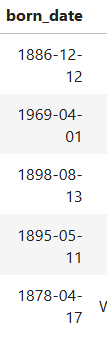

bisa dikatakan lebih mudah, dan disarankan untuk *covert* tipe data kolom tersebut ke bentuk `Date Time`

In [197]:
bios_new['born_datetime'] = pd.to_datetime(bios['born_date'])

In [198]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet,1878-04-17


mungkin secara sekilas kolom `born_date` dengan kolom yang baru kita buat yaitu : `born_datetime`, tidak terlihat perbedaan. Tapi kita bisa cek di `.info` kalo seharusnya tipe data kolomnya beda.

In [199]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     145500 non-null  int64         
 1   name           145500 non-null  object        
 2   born_date      143693 non-null  object        
 3   born_city      110908 non-null  object        
 4   born_region    110908 non-null  object        
 5   born_country   110908 non-null  object        
 6   NOC            145499 non-null  object        
 7   height_cm      106651 non-null  float64       
 8   weight_kg      102070 non-null  float64       
 9   died_date      33940 non-null   object        
 10  first_name     145500 non-null  object        
 11  last_name      145500 non-null  object        
 12  born_datetime  143693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 14.4+ MB


**`12  born_datetime  143693 non-null  datetime64[ns]`**

nah itu perbedaanya. Tadi kita niatnya kan ambil tahun lahir dari atlet kan, nah kita ambil tahunya saja sebagai kolom baru `born_year`

In [200]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year

In [201]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy,1886-12-12,1886.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch,1969-04-01,1969.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra,1898-08-13,1898.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon,1895-05-11,1895.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet,1878-04-17,1878.0


ah kolomnya jadi banyak bet

In [202]:
bios_new[['name', 'born_date', 'first_name', 'last_name', 'born_year']]

,name,born_date,first_name,last_name,born_year
0,Jean-François Blanchy,1886-12-12,Jean-François,Blanchy,1886.0
1,Arnaud Boetsch,1969-04-01,Arnaud,Boetsch,1969.0
2,Jean Borotra,1898-08-13,Jean,Borotra,1898.0
3,Jacques Brugnon,1895-05-11,Jacques,Brugnon,1895.0
4,Albert Canet,1878-04-17,Albert,Canet,1878.0
...,...,...,...,...,...
145495,Polina Luchnikova,2002-01-30,Polina,Luchnikova,2002.0
145496,Valeriya Merkusheva,1999-09-20,Valeriya,Merkusheva,1999.0
145497,Yuliya Smirnova,1998-05-08,Yuliya,Smirnova,1998.0
145498,André Foussard,1899-05-19,André,Foussard,1899.0


#### errors ='coerce'

Tadi diatas saya nyebutin kalo format datetime tahun-bulan-hari itu mudah impelemntasinya. Tapi terkadang satu hal yang harus kita tahu adalah, format tanggal bisa berbeda dan kita bisa gunakan. Nah kalo ada error ketika `pd.to_datetime`, kita bisa tambahkan *syntax* `, errors='coerce'` agar pandas menyelesaikan secara mandiri (mengubah format acak menjadi format tahun-bulan-tanggal)

In [203]:
bios_new['born_datetime'] = pd.to_datetime(bios['born_date'], errors='coerce')

atau kita bisa mengubah secara manual tanggalnya dengan :

In [204]:
bios_new['born_datetime'] = pd.to_datetime(bios['born_date'], format='%Y-%m-%d')

---

## Saving Our Update DataFrame

sapa tau kepake kan datanya, jadi lebih simple karena kita udah nyimpen `first_name`, `last_name`, `born_datetime`, `born_year`

#### to csv

In [205]:
bios_new.to_csv('./konversi data/bios_new.csv', index=False)

#### to excel

In [206]:
bios_new.to_excel('./konversi data/bios_new.xlsx', index=False)

buset, ke excel aja juga lamanya bukan maen, kirain pas `read_excel` doang yang lama

#### to parquet

In [207]:
bios_new.to_parquet('./konversi data/bios_new.parquet', index=False)

-_- itu barusan ga sampe 2 detik kelar

#### to feather

In [208]:
# bios_new.to_feather('./konversi data/bios_new.feather', index=False)

baru tau feather ga bisa make `index=False`

In [209]:
bios_new.to_feather('./konversi data/bios_new.feather')

ini kek nya lebih cepet lagi

Penggunaan `, index=False` adalah **biar pandas atau python nya tuh ga buat kolom baru dengan nama `Index`** atau apa gitu lah yang mengisyaratkan kolom sebagai penujuk urutan data

---

## Adding / Removing Columns 3

#### Using Lambda w/ .apply()

Anggaplah kita pengen buat kolom baru lagi dengan menambahkan .. mungkin kategori berdasarkan tinggi badan seseorang. Semisal :

- < 165 : pendek
- < 185 : rata-rata
- \> 185 : tinggi

In [210]:
bios_new['height_category'] = bios_new['height_cm'].apply(lambda x: 'Short' if x < 165 else ('Average' if x < 185 else 'Tall'))

In [211]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year,height_category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy,1886-12-12,1886.0,Tall
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch,1969-04-01,1969.0,Average
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra,1898-08-13,1898.0,Average
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon,1895-05-11,1895.0,Average
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet,1878-04-17,1878.0,Tall


kita cek yang pendek siapa ae

In [212]:
bios_new[(bios_new['height_category'] == 'Short') & (bios_new['born_country'] == 'INA')].head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year,height_category
242,243,Susy Susanti,1971-02-11,Tasikmalaya,Jawa Barat,INA,Indonesia,161.0,NaN,NaN,Susy,Susanti,1971-02-11,1971.0,Short
243,244,Lili Tampi,1970-05-19,Tasikmalaya,Jawa Barat,INA,Indonesia,161.0,NaN,NaN,Lili,Tampi,1970-05-19,1970.0,Short
246,247,Minarti Timur,1968-03-24,Surabaya,Jawa Timur,INA,Indonesia,163.0,55.0,NaN,Minarti,Timur,1968-03-24,1968.0,Short
247,248,Mia Audina,1979-08-22,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia Netherlands,163.0,67.0,NaN,,Audina,1979-08-22,1979.0,Short
1879,1889,Lilies Handayani,1965-04-15,Surabaya,Jawa Timur,INA,Indonesia,155.0,50.0,NaN,Lilies,Handayani,1965-04-15,1965.0,Short


In [213]:
bios_new[(bios_new['height_category'] == 'Average') & (bios_new['born_country'] == 'INA')].head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year,height_category
232,233,Yayuk Basuki,1970-11-30,Yogyakarta,Daerah Istimewa Yogyakarta,INA,Indonesia,165.0,55.0,NaN,Yayuk,Basuki,1970-11-30,1970.0,Average
238,239,Zelin Resiana,1972-07-09,Magelang,Jawa Tengah,INA,Indonesia,169.0,58.0,NaN,Zelin,Resiana,1972-07-09,1972.0,Average
249,250,Antonius Ariantho,1971-10-03,Pekalongan,Jawa Tengah,INA,Indonesia,170.0,66.0,NaN,Antonius,Ariantho,1971-10-03,1971.0,Average
251,252,Eddy Hartono,1964-07-19,Kudus,Jawa Tengah,INA,Indonesia,173.0,73.0,NaN,Eddy,Hartono,1964-07-19,1964.0,Average
252,253,Hariyanto Arbi,1972-01-21,Kudus,Jawa Tengah,INA,Indonesia,178.0,70.0,NaN,Hariyanto,Arbi,1972-01-21,1972.0,Average


In [214]:
bios_new[(bios_new['height_category'] == 'Tall') & (bios_new['born_country'] == 'INA')].head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year,height_category
233,234,Rossy Pratiwi Dipoyanti,1972-06-28,Bandung,Jawa Barat,INA,Indonesia,NaN,NaN,NaN,Rossy,Dipoyanti,1972-06-28,1972.0,Tall
234,235,Finarsih,1972-02-08,Sleman,Jawa Tengah,INA,Indonesia,NaN,NaN,NaN,,Finarsih,1972-02-08,1972.0,Tall
235,236,Ling Ling Agustin,1969-08-23,Kediri,Jawa Timur,INA,Indonesia,NaN,NaN,NaN,Ling,Agustin,1969-08-23,1969.0,Tall
239,240,Yuliani Santoso,1971-10-29,Semarang,Jawa Tengah,INA,Indonesia,NaN,NaN,NaN,Yuliani,Santoso,1971-10-29,1971.0,Tall
240,241,Sarwendah Kusumawardhani,1967-08-22,Malang,Jawa Timur,INA,Indonesia,NaN,NaN,NaN,Sarwendah,Kusumawardhani,1967-08-22,1967.0,Tall


oke jadi itu yah cara `.apply` menggunakan `lambda` di Pandas. Apalagi dibuat secara spesifik berdasarkan tinggi berapa kategorinya berapa, tinggi diatas sekian kategorinya apa dan seterusnya.

---

#### Custome Function with .apply()

Hal lain yang bisa kita lakukan adalah membuat `Function` atau fungsi dalam pandas menggunakan `.apply()`. Tapi mau buat kolom paan lagi ya?

ah mungkin kelas seseorang kek Tinju gitu kali ye, 

In [215]:
def categorize_atlet(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Kelas Ringan'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Kelas Menengah'

    else:
        return 'Kelas Berat'

bios_new['Category'] = bios_new.apply(categorize_atlet, axis=1) # 1 untuk baris, 0 untuk kolom

Ingat, *mungkin tidak se'efisien Pandas lambda diatas*, **tapi menggunakan Function ini akan memudahkan seseorang untuk mengerti apa maksudnya**. Ya walaupun terlepas dari loadingnya lumayan lama ketika di run.

In [216]:
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name,born_datetime,born_year,height_category,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy,1886-12-12,1886.0,Tall,Kelas Berat
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch,1969-04-01,1969.0,Average,Kelas Menengah
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra,1898-08-13,1898.0,Average,Kelas Menengah
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon,1895-05-11,1895.0,Average,Kelas Ringan
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet,1878-04-17,1878.0,Tall,Kelas Berat


hmm kek nya di save ulang aja dah

#### Save ulang

In [217]:
bios_new.to_csv('./konversi data/bios_new.csv', index=False)

In [218]:
bios_new.to_excel('./konversi data/bios_new.xlsx', index=False)

In [219]:
bios_new.to_parquet('./konversi data/bios_new.parquet', index=False)

In [220]:
bios_new.to_feather('./konversi data/bios_new.feather')

---